<a href="https://colab.research.google.com/github/kinderasteroid/Food-Vision-Model/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network and Computer Vision

#Get The Data

In [2]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-09-06 20:35:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  80.3MB/s    in 1.3s    

2023-09-06 20:35:14 (80.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import random
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()
import os
import pathlib as plib
import numpy as np

def_path = plib.Path("pizza_steak/train/")
class_name = ['pizza','steak']

def gen_image(cname):
  path = "pizza_steak/train/"+cname
  ranimg = random.sample(os.listdir(path),1)
  img = mpimg.imread(path+"/"+ranimg[0])
  plt.imshow(img)
  return img


#Inspect the Data

(512, 512, 3)

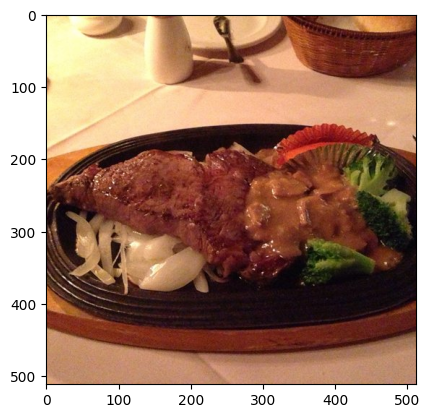

In [4]:
img = gen_image('steak')
tf.constant(img)
img.shape


#Normalize The Data Before Passing to Tensor 🔑🔑🔑🔑🔑IMPORTANT

In [5]:
img/255

array([[[0.97254902, 0.83137255, 0.63529412],
        [0.97647059, 0.83529412, 0.63137255],
        [0.95686275, 0.82745098, 0.61960784],
        ...,
        [0.56862745, 0.28627451, 0.19215686],
        [0.54509804, 0.25882353, 0.18431373],
        [0.54117647, 0.25490196, 0.18039216]],

       [[1.        , 0.85882353, 0.6627451 ],
        [0.99607843, 0.86666667, 0.65882353],
        [0.99607843, 0.86666667, 0.65490196],
        ...,
        [0.59607843, 0.31372549, 0.21960784],
        [0.57254902, 0.29019608, 0.20392157],
        [0.54509804, 0.25882353, 0.18431373]],

       [[0.99607843, 0.86666667, 0.65882353],
        [0.99607843, 0.8745098 , 0.65882353],
        [1.        , 0.88235294, 0.65882353],
        ...,
        [0.62352941, 0.34117647, 0.24705882],
        [0.6       , 0.31764706, 0.23137255],
        [0.55686275, 0.2745098 , 0.18823529]],

       ...,

       [[0.8745098 , 0.6627451 , 0.47843137],
        [0.8627451 , 0.65098039, 0.46666667],
        [0.86666667, 0

#Convolutional Neural Network

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

traindatagen = ImageDataGenerator(rescale=1/255)
testdatagen = ImageDataGenerator(rescale=1/255)

In [7]:
traindata = traindatagen.flow_from_directory('pizza_steak/train/',target_size=(244,244),class_mode="binary",batch_size=32)
testdata =  testdatagen.flow_from_directory('pizza_steak/test/',target_size=(244,244),batch_size=32,class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = tf.keras.Sequential([
    Conv2D(filters=10,kernel_size=3,input_shape=(244,244,3),padding="valid",strides=(1,1),activation="relu"),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
model.summary()
history = model.fit(traindata,epochs=5,steps_per_epoch=len(traindata),validation_data = (testdata),validation_steps=len(testdata))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 238, 238, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 566440)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 566441    
                                                                 
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
47/47 [==============================]

<Axes: >

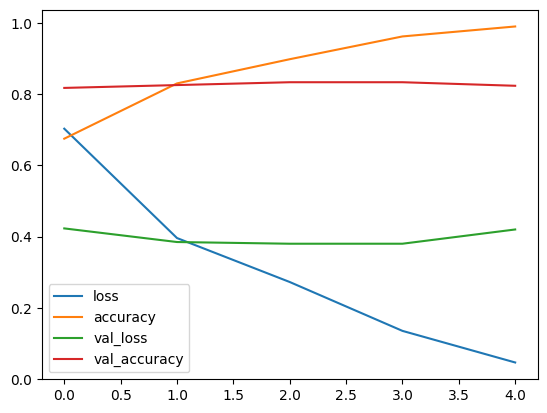

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot()